# Feature Engineering

Workflow:

- Handle Numerical Features:
1. Outliers removal: use Winsorizing
2. Feature transformation: use Log normalization for skewed features
3. Apply Binning for multimodal features

- Handle Categorical features:
1. Feature Encoding: Label Encoding for binary categorical features, one-hot for multi categorical features.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('data_files/concatted_data.csv')

df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,0
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,0
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,0
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,0
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,0


In [47]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

## Label Encoding

In [44]:
df['room_type'] = df['room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2})
df['room_shared'] = df['room_shared'].replace({False: 0, True: 1})
df['room_private'] = df['room_private'].replace({False: 0, True: 1})
df['host_is_superhost'] = df['host_is_superhost'].replace({False: 0, True: 1})
df['city'] = df['city'].replace({'London': 0, 'Rome': 1, 'Paris': 2, 'Lisbon': 3, 'Athens': 4, 'Budapest': 5, 'Vienna': 6, 'Barcelona': 7, 'Berlin': 8, 'Amsterdam': 9 })

In [50]:
categorical_features = ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'bedrooms', 'city', 'is_weekend']
numerical_features = ['guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

## Numerical Features

### Remove Outliers

Apply **Winsorization** for numerical features with outliers

In [51]:
outliers_info = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    outliers_info[feature] = {
        'num_outliers': len(outliers),
        'outlier_percentage (%)': outlier_percentage
    }
    # Winsorize: Cap the values to the boundaries
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

outliers_summary = pd.DataFrame(outliers_info).transpose()
outliers_summary

,num_outliers,outlier_percentage (%)
guest_satisfaction_overall,2102.0,4.065214
dist,1746.0,3.376719
metro_dist,5051.0,9.768503
attr_index,2237.0,4.326300
attr_index_norm,1852.0,3.581720
rest_index,2166.0,4.188988
rest_index_norm,998.0,1.930106
lng,0.0,0.000000
lat,0.0,0.000000


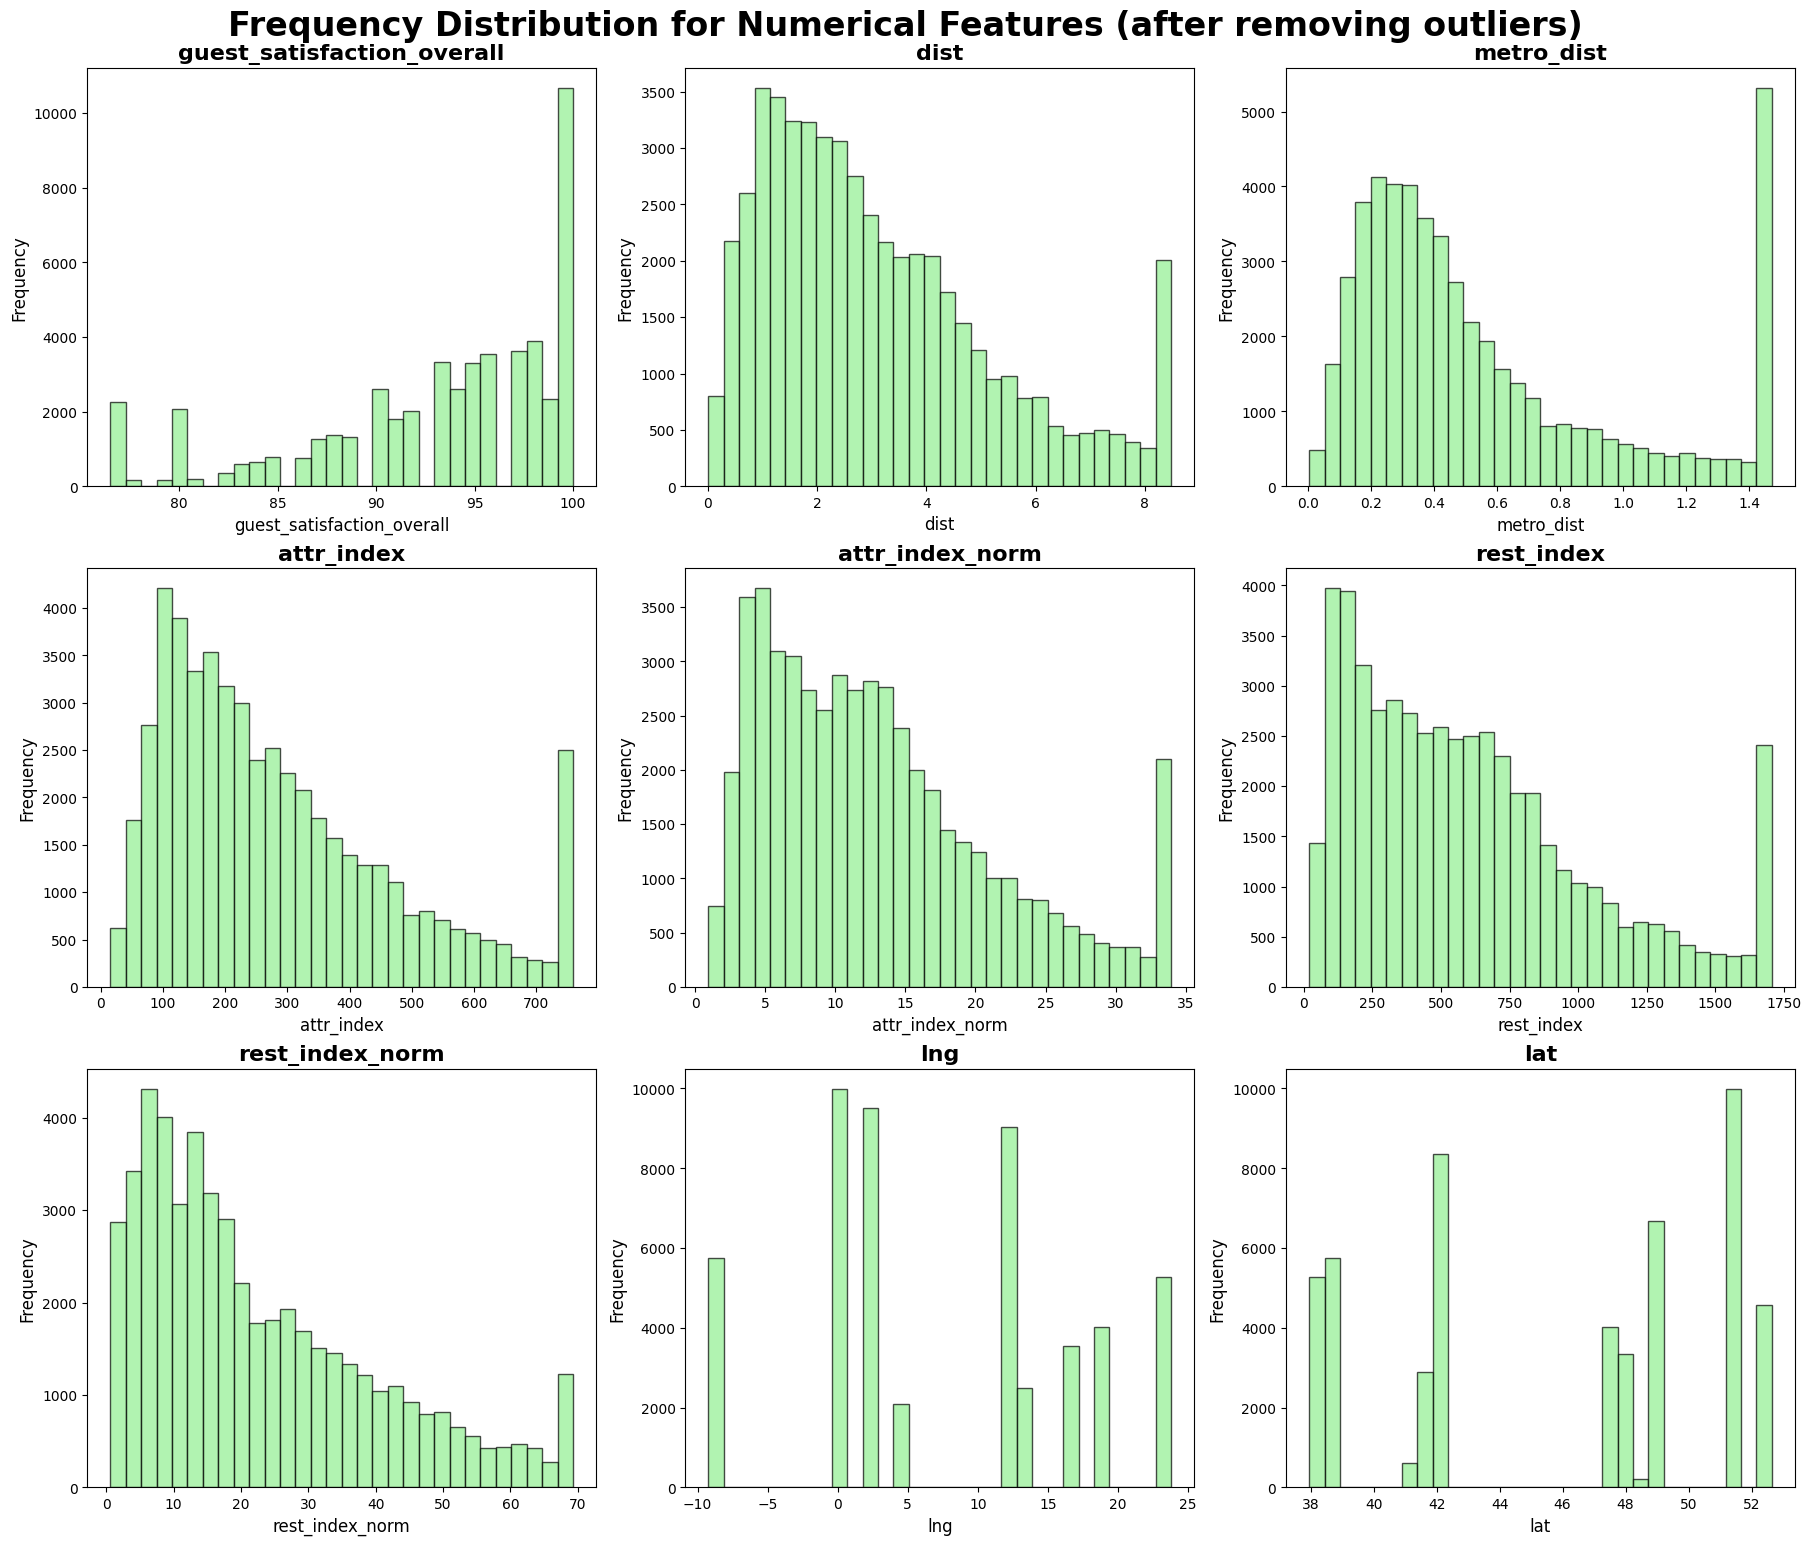

In [56]:
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Frequency Distribution for Numerical Features (after removing outliers)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    df[col].plot(
        kind="hist", bins=30, color="lightgreen", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

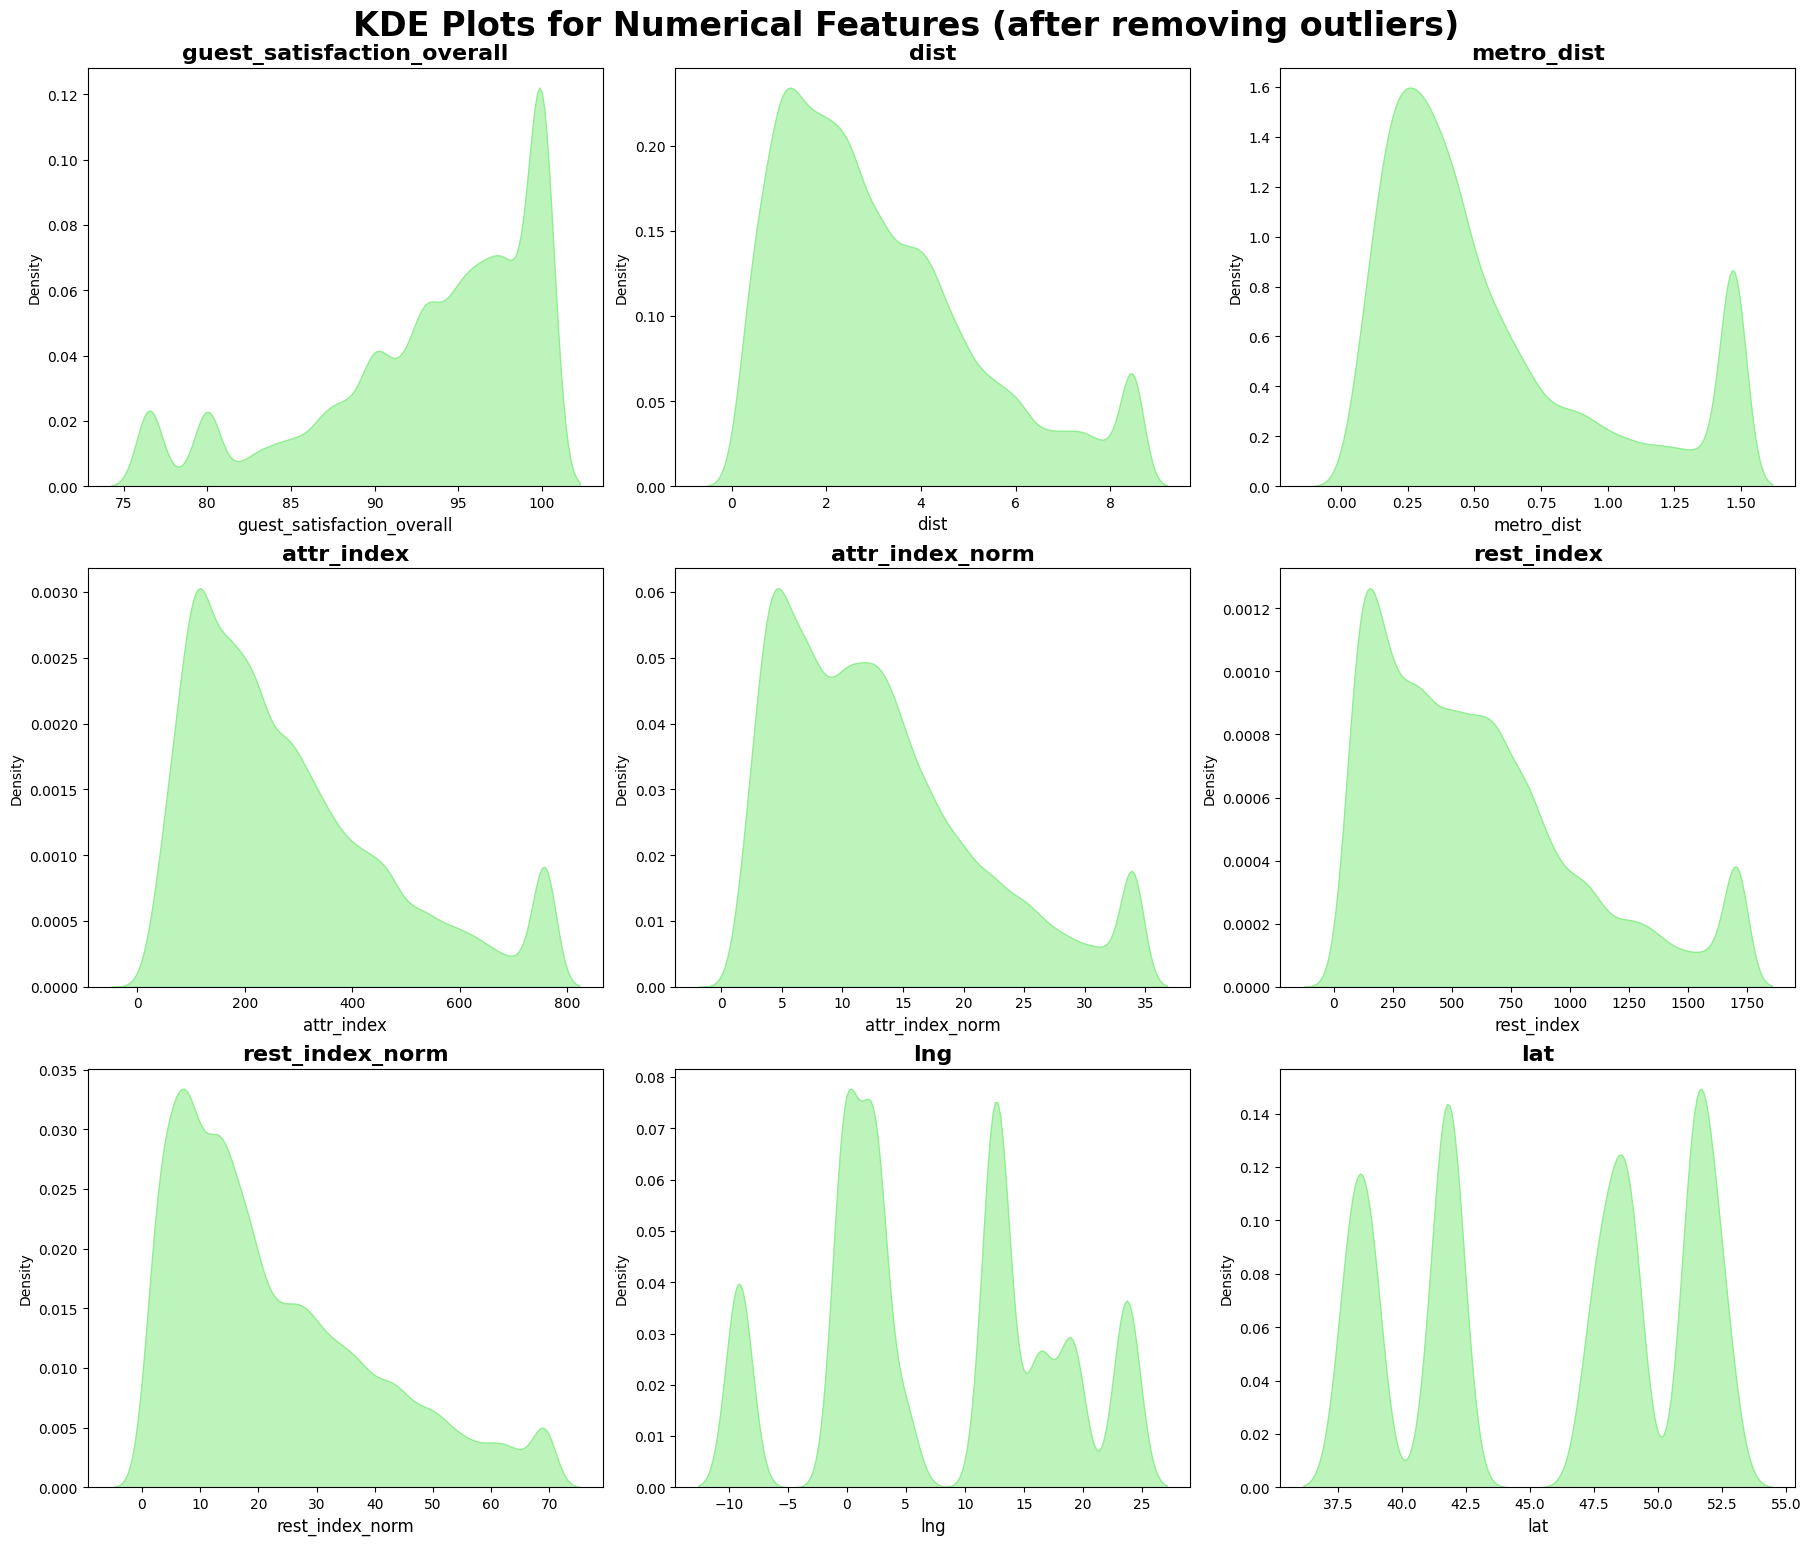

In [58]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features (after removing outliers)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="lightgreen", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Feature Transformation

Implement **log transformation** to handle skewness

In [59]:
# No zero or negative value exist so,

# numerical_features = ['guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
df['guest_satisfaction_overall'] = np.log(df['guest_satisfaction_overall'])
df['dist'] = np.log(df['dist'])
df['metro_dist'] = np.log(df['metro_dist'])
df['attr_index'] = np.log(df['attr_index'])
df['attr_index_norm'] = np.log(df['attr_index_norm'])
df['rest_index'] = np.log(df['rest_index'])
df['rest_index_norm'] = np.log(df['rest_index_norm'])
df['lng'] = np.log(df['lng'])
df['lat'] = np.log(df['lat'])

c:\Users\fizuf\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


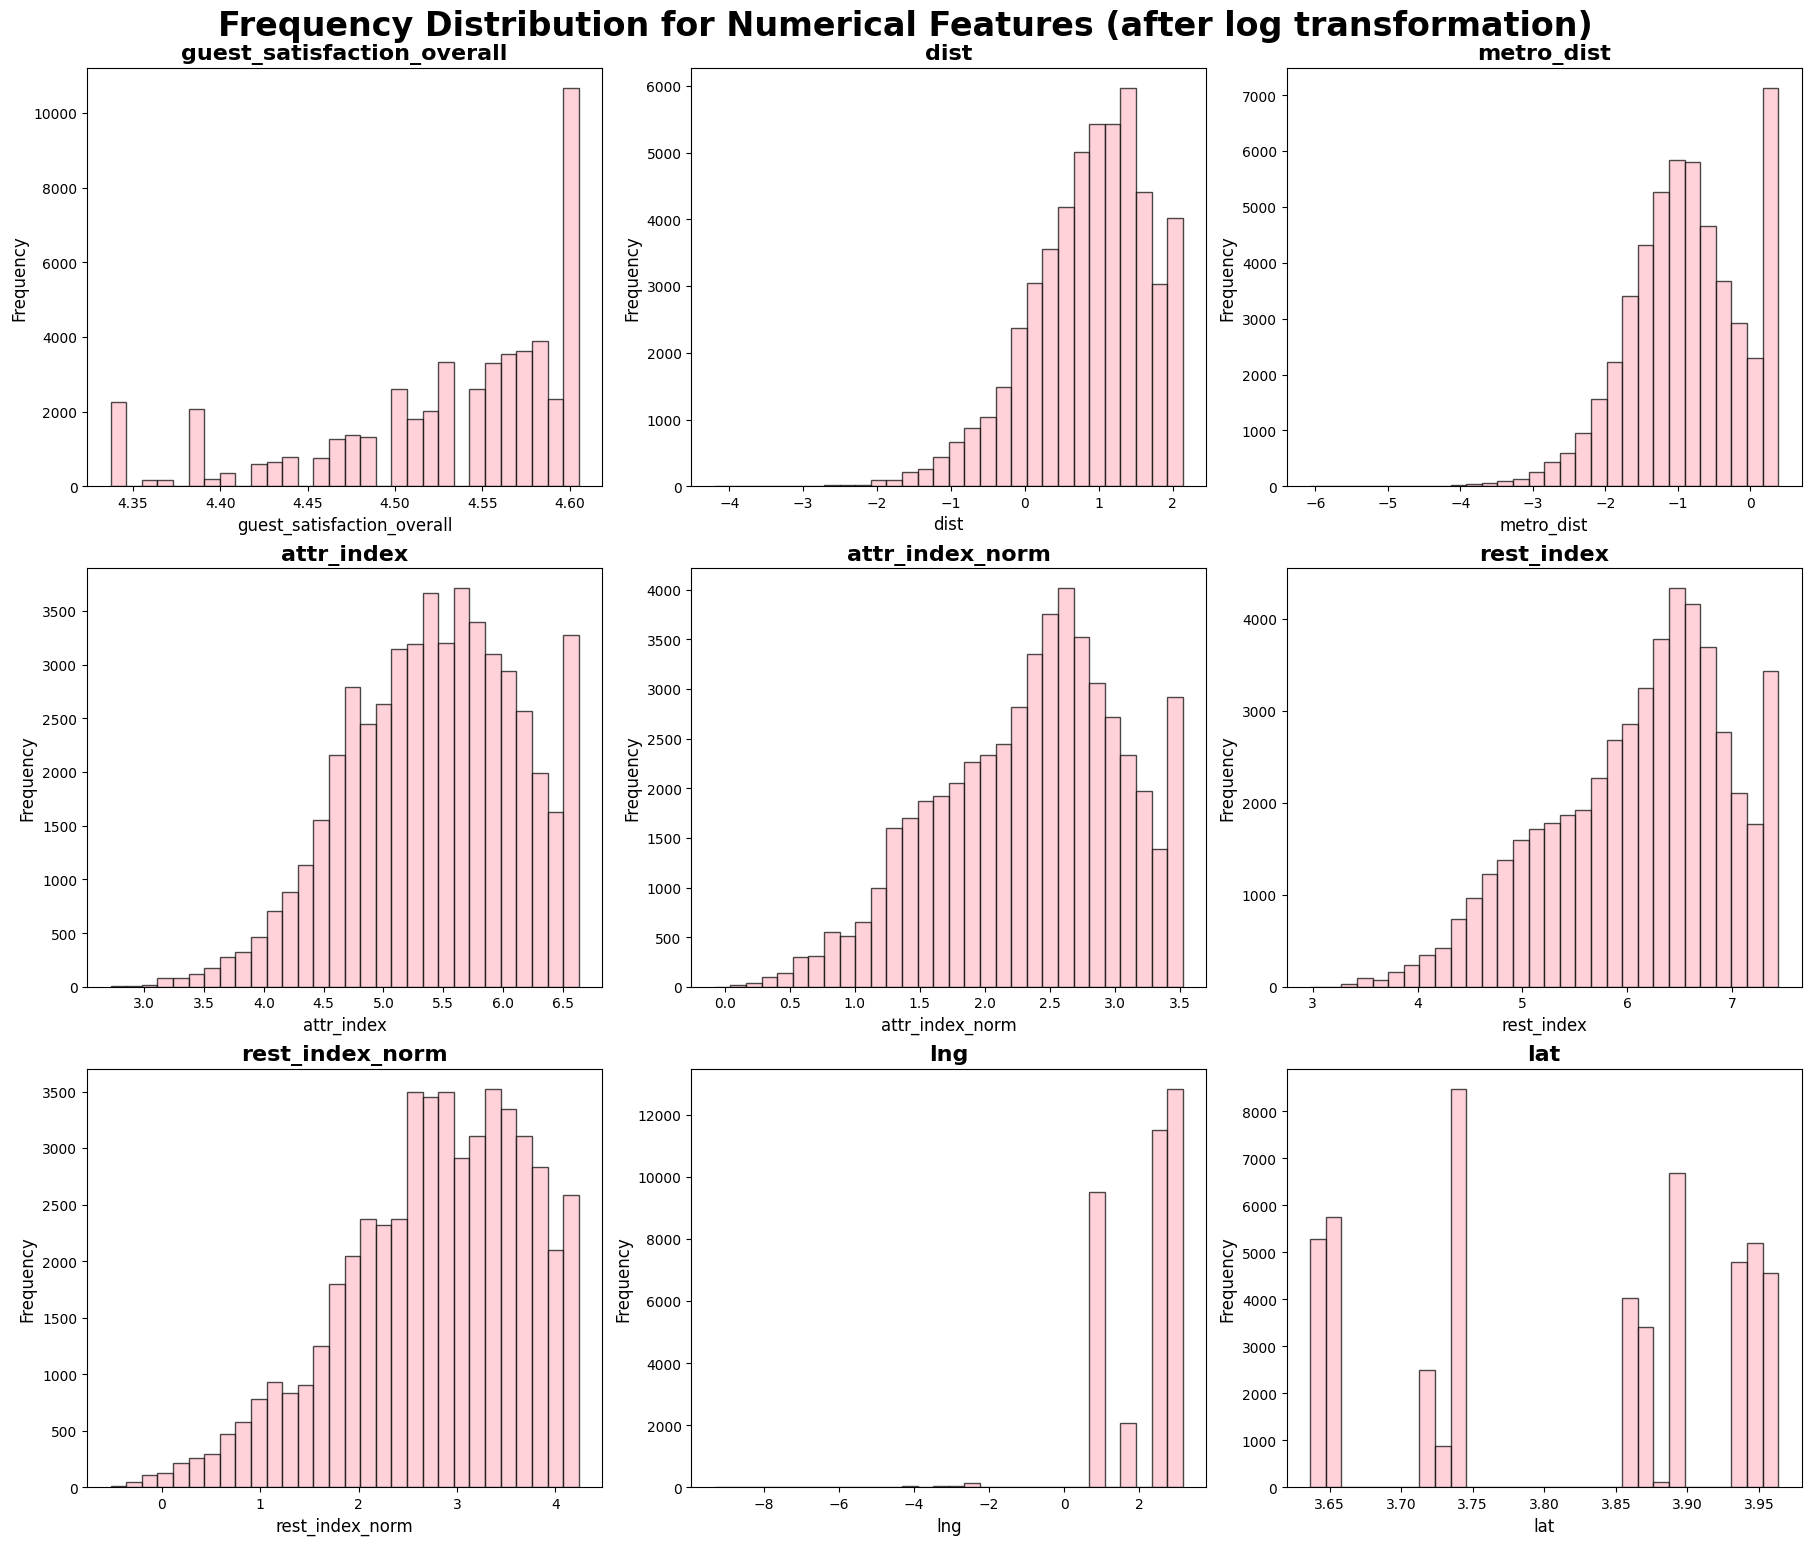

In [63]:
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("Frequency Distribution for Numerical Features (after log transformation)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    df[col].plot(
        kind="hist", bins=30, color="pink", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

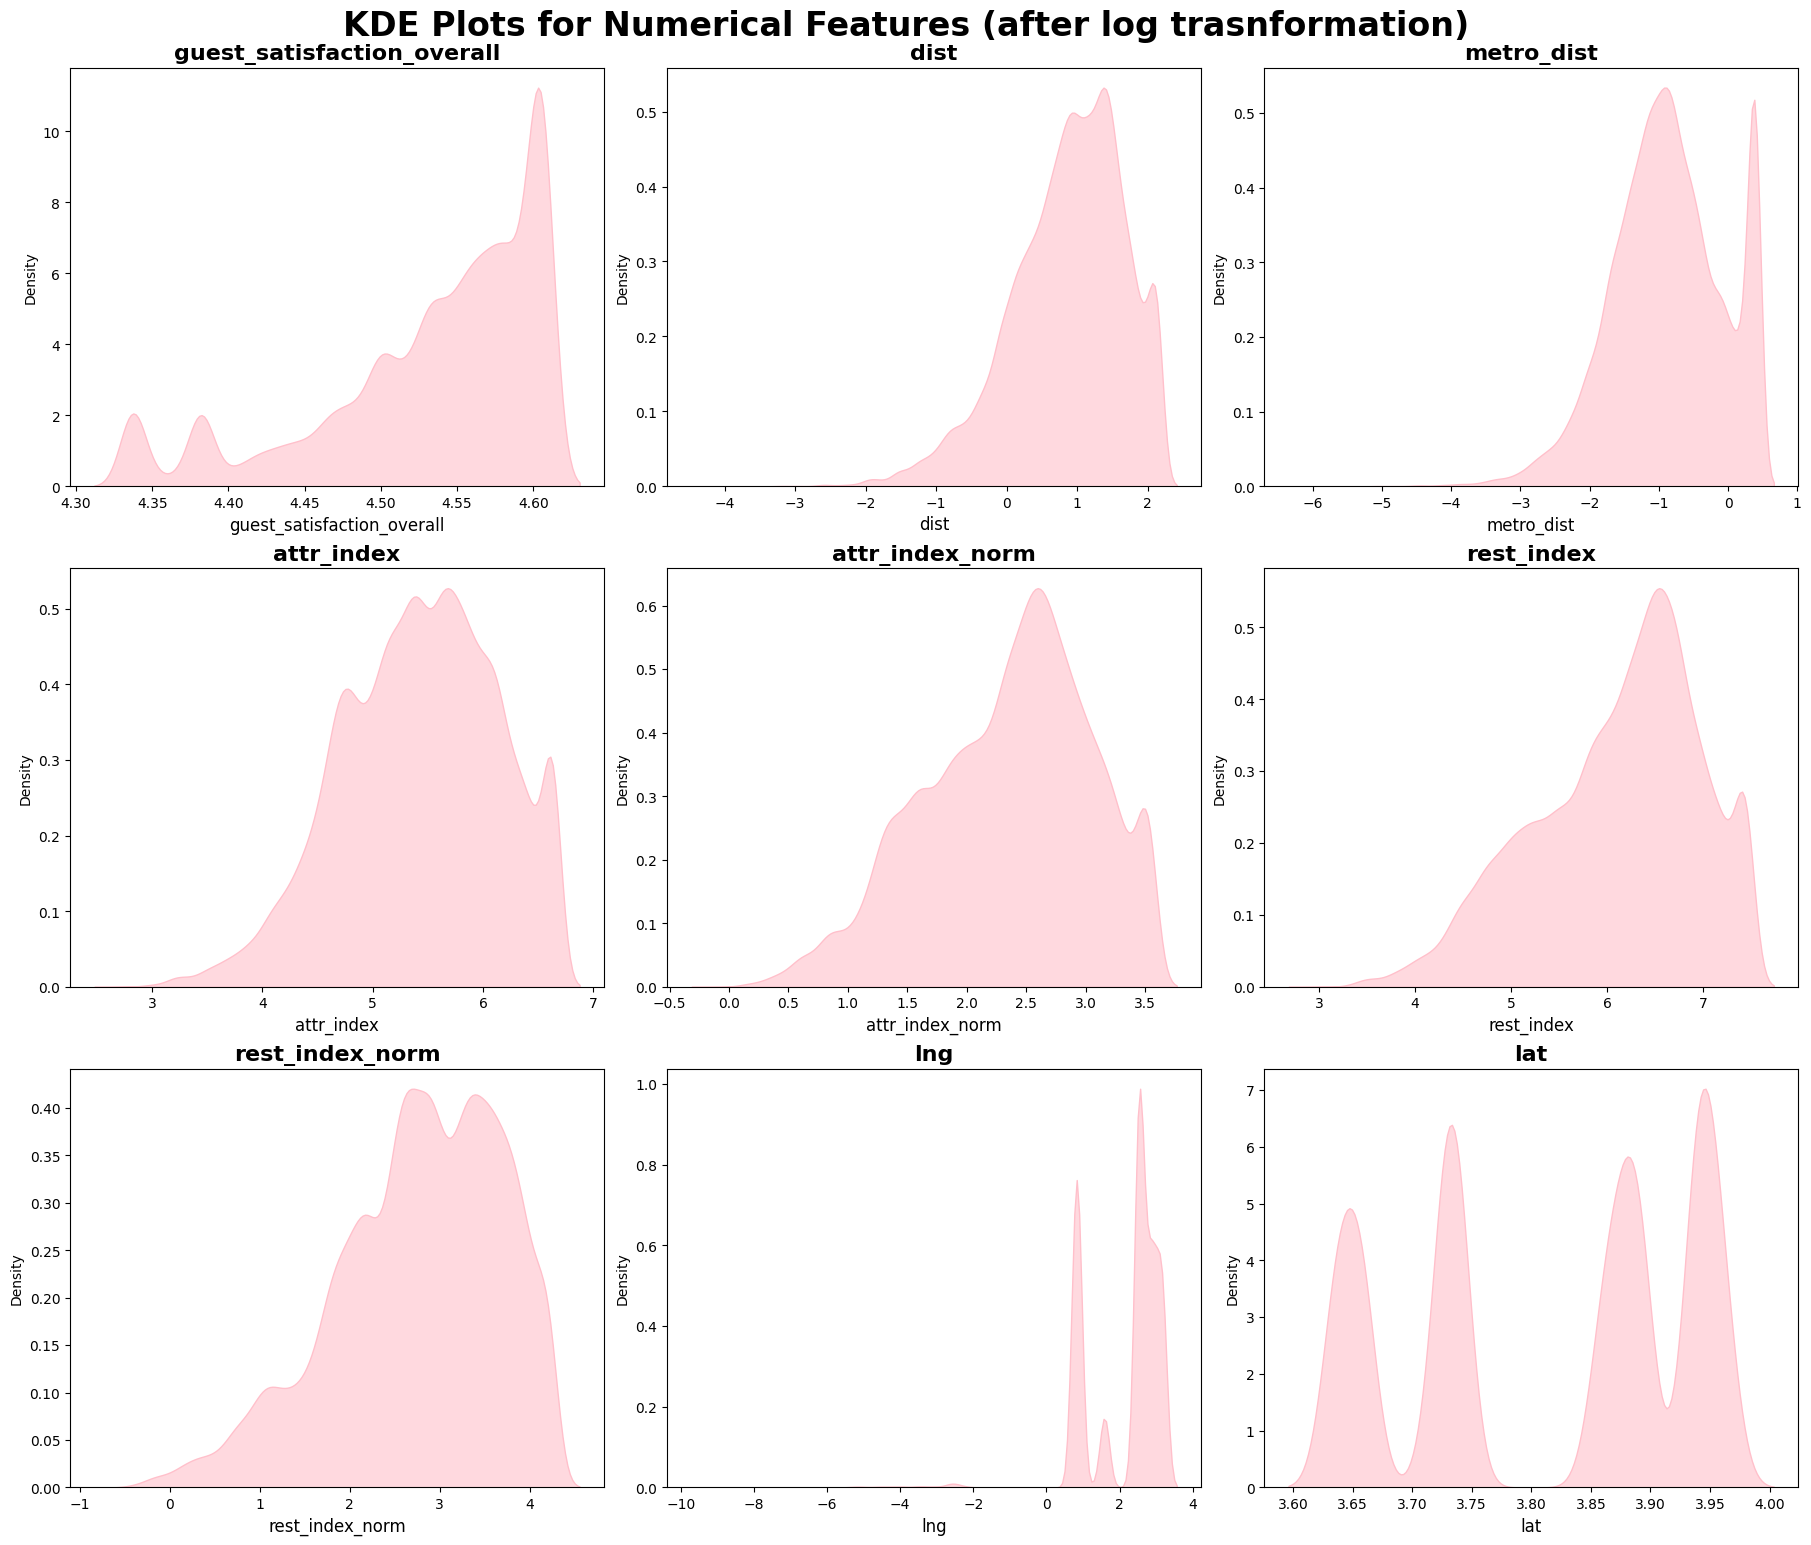

In [64]:
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features (after log trasnformation)", fontsize=24, fontweight='bold', y=1.02)
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="pink", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

Apply **Log Transformation** to handle skewness

- Log Normalization: `attr_index`, `rest_index`, `guess_satisfaction_overall`, `dist`, `metro_dist`
- 